In [73]:
import pandas as pd
import numpy as np

import xgboost as xgb

import matplotlib.pyplot as plt

import seaborn as sns

import os, sys

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data_path = 'data/with_irrig/'
inputs_path = data_path + 'inputs/'
intermediate_path = data_path + 'intermediate/'
output_data = data_path + 'output/'

figure_path = 'figures/'

In [3]:
numerical_col = ['slope', 'Annual Mean Temperature',
               'Mean Diurnal Range', 'Isothermality', 'Temperature Seasonality',
               'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
               'Temperature Annual Range', 'Annual Precipitation',
               'Precipitation of Wettest Month', 'Precipitation of Driest Month',
               'Precipitation Seasonality', 'fertl_c3ann', 'fertl_c3nfx',
               'fertl_c3per', 'fertl_c4ann', 'log_altitude', 'irrig_c3ann', 
               'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per']

non_numerical_col = ['nutrient_availability_index', 'oxygen_availability_index',
               'workability_index', 'protected_areas_index', 'nutrient_retention_index', 
               'toxicity_index', 'excess_salts_index', 'rooting_conditions_index', 'cat_gdp']

## Simple regressor

In [67]:
df_2000 = pd.read_csv(inputs_path + 'normalized_2000_gdp_cat.csv', index_col='pixel_id', na_values=[-9999]).drop(['log_GDP_pc'], axis=1)

In [68]:
df_2000.head()

,slope,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Annual Precipitation,Precipitation of Wettest Month,...,nutrient_availability_index,oxygen_availability_index,workability_index,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,calories_per_ha,cat_gdp
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,-0.153686,-1.475497,-1.165186,-1.144281,0.809341,-1.712443,-1.131726,0.526905,-0.529328,-0.764668,...,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,8.917904e+09,1.0
1276867,-0.044311,-1.450093,-1.237776,-1.168411,0.799235,-1.697998,-1.119308,0.518887,-0.542167,-0.789142,...,0.333333,0.500000,0.0,0.0,0.166667,0.0,0.0,0.0,8.917904e+09,1.0
1276868,-0.064612,-1.451896,-1.224768,-1.167575,0.812007,-1.682255,-1.121053,0.529160,-0.552153,-0.780984,...,0.333333,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,8.917905e+09,1.0
1298466,-0.029986,-1.373057,-1.550443,-1.245204,0.779111,-1.614412,-0.995392,0.407722,-0.629187,-0.797301,...,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,8.917906e+09,1.0
1298467,-0.027755,-1.386652,-1.462573,-1.218038,0.766754,-1.639893,-1.020766,0.426180,-0.619201,-0.789142,...,0.333333,0.333333,0.0,0.0,0.166667,0.0,0.0,0.0,8.917904e+09,1.0


In [69]:
df_2000.columns

Index(['slope', 'Annual Mean Temperature', 'Mean Diurnal Range',
       'Isothermality', 'Temperature Seasonality',
       'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
       'Temperature Annual Range', 'Annual Precipitation',
       'Precipitation of Wettest Month', 'Precipitation of Driest Month',
       'Precipitation Seasonality', 'fertl_c3ann', 'fertl_c3nfx',
       'fertl_c3per', 'fertl_c4ann', 'log_altitude', 'irrig_c3ann',
       'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per',
       'nutrient_availability_index', 'oxygen_availability_index',
       'workability_index', 'protected_areas_index',
       'nutrient_retention_index', 'toxicity_index', 'excess_salts_index',
       'rooting_conditions_index', 'calories_per_ha', 'cat_gdp'],
      dtype='object')

### Without irrig data

In [143]:
col_to_drop = ['irrig_c3ann', 'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per', ]

In [144]:
X, y = df_2000.drop(col_to_drop + ['calories_per_ha'], axis=1), df_2000['calories_per_ha']
X = pd.get_dummies(X, columns=non_numerical_col)

data_dmatrix = xgb.DMatrix(data=X, label=y)

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [146]:
model = xgb.XGBRegressor(n_estimators=500)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["rmse"], eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:7.61e+09	validation_1-rmse:7.62662e+09
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:6.98731e+09	validation_1-rmse:7.00408e+09
[2]	validation_0-rmse:6.43631e+09	validation_1-rmse:6.45298e+09
[3]	validation_0-rmse:5.95782e+09	validation_1-rmse:5.9739e+09
[4]	validation_0-rmse:5.53476e+09	validation_1-rmse:5.54944e+09
[5]	validation_0-rmse:5.15971e+09	validation_1-rmse:5.17435e+09
[6]	validation_0-rmse:4.83723e+09	validation_1-rmse:4.85121e+09
[7]	validation_0-rmse:4.55259e+09	validation_1-rmse:4.56633e+09
[8]	validation_0-rmse:4.31151e+09	validation_1-rmse:4.3239e+09
[9]	validation_0-rmse:4.096e+09	validation_1-rmse:4.10877e+09
[10]	validation_0-rmse:3.91071e+09	validation_1-rmse:3.92279e+09
[11]	validation_0-rmse:3.74912e+09	validation_1-rmse:3.76099e+09
[12]	validation_0-rmse:3.61316e+09	validation_1-rmse:3.62417e+09
[13]	validati

[124]	validation_0-rmse:2.55521e+09	validation_1-rmse:2.56927e+09
[125]	validation_0-rmse:2.5528e+09	validation_1-rmse:2.56708e+09
[126]	validation_0-rmse:2.55091e+09	validation_1-rmse:2.56515e+09
[127]	validation_0-rmse:2.54832e+09	validation_1-rmse:2.56265e+09
[128]	validation_0-rmse:2.54685e+09	validation_1-rmse:2.56125e+09
[129]	validation_0-rmse:2.54571e+09	validation_1-rmse:2.56009e+09
[130]	validation_0-rmse:2.54254e+09	validation_1-rmse:2.55696e+09
[131]	validation_0-rmse:2.54035e+09	validation_1-rmse:2.55491e+09
[132]	validation_0-rmse:2.53917e+09	validation_1-rmse:2.55385e+09
[133]	validation_0-rmse:2.53871e+09	validation_1-rmse:2.55341e+09
[134]	validation_0-rmse:2.53782e+09	validation_1-rmse:2.55259e+09
[135]	validation_0-rmse:2.53722e+09	validation_1-rmse:2.55192e+09
[136]	validation_0-rmse:2.5355e+09	validation_1-rmse:2.55019e+09
[137]	validation_0-rmse:2.53455e+09	validation_1-rmse:2.54931e+09
[138]	validation_0-rmse:2.5334e+09	validation_1-rmse:2.54829e+09
[139]	validat

[249]	validation_0-rmse:2.40318e+09	validation_1-rmse:2.42179e+09
[250]	validation_0-rmse:2.40284e+09	validation_1-rmse:2.42148e+09
[251]	validation_0-rmse:2.40177e+09	validation_1-rmse:2.42051e+09
[252]	validation_0-rmse:2.3999e+09	validation_1-rmse:2.41863e+09
[253]	validation_0-rmse:2.39895e+09	validation_1-rmse:2.41777e+09
[254]	validation_0-rmse:2.39746e+09	validation_1-rmse:2.41627e+09
[255]	validation_0-rmse:2.39671e+09	validation_1-rmse:2.41563e+09
[256]	validation_0-rmse:2.39578e+09	validation_1-rmse:2.41462e+09
[257]	validation_0-rmse:2.39528e+09	validation_1-rmse:2.41413e+09
[258]	validation_0-rmse:2.39509e+09	validation_1-rmse:2.41399e+09
[259]	validation_0-rmse:2.39497e+09	validation_1-rmse:2.41387e+09
[260]	validation_0-rmse:2.39399e+09	validation_1-rmse:2.41295e+09
[261]	validation_0-rmse:2.39345e+09	validation_1-rmse:2.41245e+09
[262]	validation_0-rmse:2.39221e+09	validation_1-rmse:2.41124e+09
[263]	validation_0-rmse:2.39129e+09	validation_1-rmse:2.41033e+09
[264]	valid

[374]	validation_0-rmse:2.31617e+09	validation_1-rmse:2.33787e+09
[375]	validation_0-rmse:2.31574e+09	validation_1-rmse:2.33741e+09
[376]	validation_0-rmse:2.31503e+09	validation_1-rmse:2.33659e+09
[377]	validation_0-rmse:2.31492e+09	validation_1-rmse:2.33651e+09
[378]	validation_0-rmse:2.3147e+09	validation_1-rmse:2.33627e+09
[379]	validation_0-rmse:2.31462e+09	validation_1-rmse:2.3362e+09
[380]	validation_0-rmse:2.31401e+09	validation_1-rmse:2.33557e+09
[381]	validation_0-rmse:2.31365e+09	validation_1-rmse:2.33517e+09
[382]	validation_0-rmse:2.31333e+09	validation_1-rmse:2.33484e+09
[383]	validation_0-rmse:2.31295e+09	validation_1-rmse:2.33453e+09
[384]	validation_0-rmse:2.31284e+09	validation_1-rmse:2.3344e+09
[385]	validation_0-rmse:2.31209e+09	validation_1-rmse:2.33362e+09
[386]	validation_0-rmse:2.31149e+09	validation_1-rmse:2.33296e+09
[387]	validation_0-rmse:2.31134e+09	validation_1-rmse:2.33279e+09
[388]	validation_0-rmse:2.31107e+09	validation_1-rmse:2.33257e+09
[389]	validat

[499]	validation_0-rmse:2.26103e+09	validation_1-rmse:2.28386e+09


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [147]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.7491701218229049


In [148]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
epochs

500

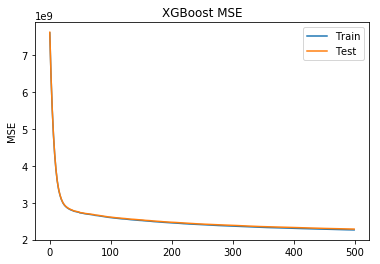

In [149]:
# plot mse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('MSE')
plt.title('XGBoost MSE')
plt.show()

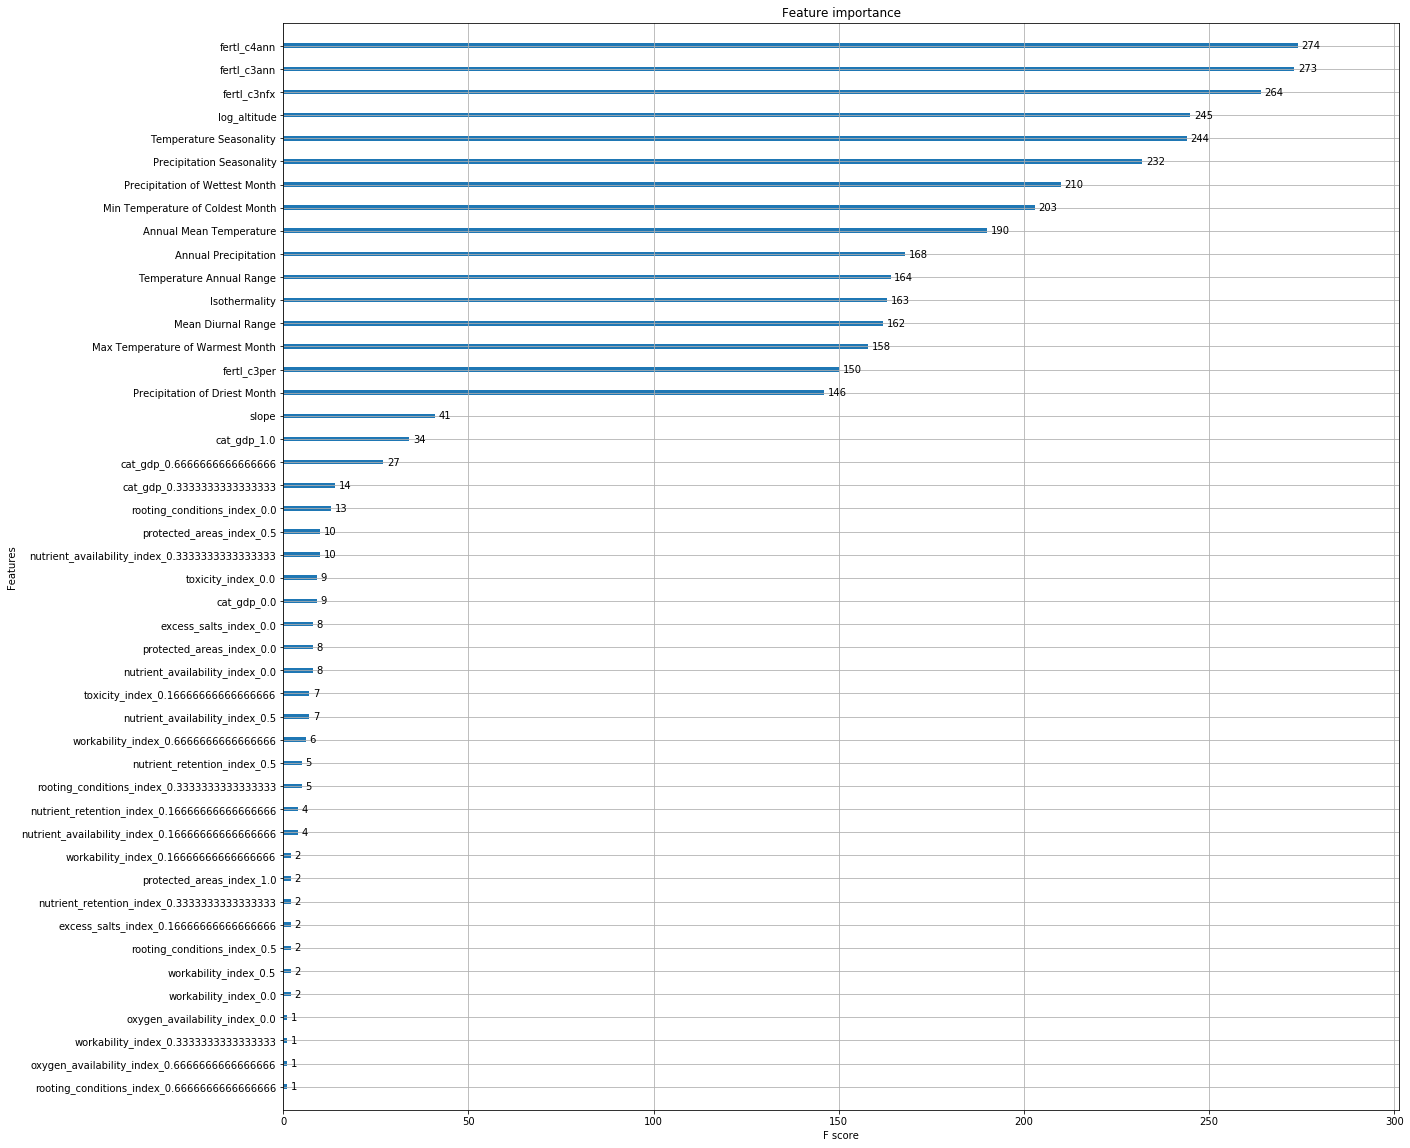

In [150]:
# which are the most influential features
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(model, ax=ax)
plt.show()

### With irrig data

In [151]:
X, y = df_2000.drop(['calories_per_ha'], axis=1), df_2000['calories_per_ha']
X = pd.get_dummies(X, columns=non_numerical_col)

data_dmatrix = xgb.DMatrix(data=X, label=y)

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [153]:
model = xgb.XGBRegressor(n_estimators=500)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["rmse"], eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:7.61e+09	validation_1-rmse:7.62662e+09
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:6.98731e+09	validation_1-rmse:7.00408e+09
[2]	validation_0-rmse:6.43631e+09	validation_1-rmse:6.45298e+09
[3]	validation_0-rmse:5.95782e+09	validation_1-rmse:5.9739e+09
[4]	validation_0-rmse:5.53476e+09	validation_1-rmse:5.54944e+09
[5]	validation_0-rmse:5.15971e+09	validation_1-rmse:5.17435e+09
[6]	validation_0-rmse:4.83723e+09	validation_1-rmse:4.85121e+09
[7]	validation_0-rmse:4.55209e+09	validation_1-rmse:4.56583e+09
[8]	validation_0-rmse:4.311e+09	validation_1-rmse:4.32327e+09
[9]	validation_0-rmse:4.09548e+09	validation_1-rmse:4.10797e+09
[10]	validation_0-rmse:3.90942e+09	validation_1-rmse:3.92118e+09
[11]	validation_0-rmse:3.74785e+09	validation_1-rmse:3.75949e+09
[12]	validation_0-rmse:3.61062e+09	validation_1-rmse:3.62246e+09
[13]	validat

[124]	validation_0-rmse:2.50453e+09	validation_1-rmse:2.5196e+09
[125]	validation_0-rmse:2.50366e+09	validation_1-rmse:2.5187e+09
[126]	validation_0-rmse:2.50312e+09	validation_1-rmse:2.51828e+09
[127]	validation_0-rmse:2.50237e+09	validation_1-rmse:2.51753e+09
[128]	validation_0-rmse:2.50084e+09	validation_1-rmse:2.51602e+09
[129]	validation_0-rmse:2.49738e+09	validation_1-rmse:2.51263e+09
[130]	validation_0-rmse:2.49598e+09	validation_1-rmse:2.51132e+09
[131]	validation_0-rmse:2.49367e+09	validation_1-rmse:2.50907e+09
[132]	validation_0-rmse:2.49096e+09	validation_1-rmse:2.50634e+09
[133]	validation_0-rmse:2.48895e+09	validation_1-rmse:2.50443e+09
[134]	validation_0-rmse:2.48675e+09	validation_1-rmse:2.50222e+09
[135]	validation_0-rmse:2.48465e+09	validation_1-rmse:2.50017e+09
[136]	validation_0-rmse:2.48249e+09	validation_1-rmse:2.49796e+09
[137]	validation_0-rmse:2.48143e+09	validation_1-rmse:2.49692e+09
[138]	validation_0-rmse:2.47949e+09	validation_1-rmse:2.49488e+09
[139]	valida

[249]	validation_0-rmse:2.35613e+09	validation_1-rmse:2.37653e+09
[250]	validation_0-rmse:2.35592e+09	validation_1-rmse:2.37641e+09
[251]	validation_0-rmse:2.35564e+09	validation_1-rmse:2.37616e+09
[252]	validation_0-rmse:2.35493e+09	validation_1-rmse:2.37559e+09
[253]	validation_0-rmse:2.354e+09	validation_1-rmse:2.3747e+09
[254]	validation_0-rmse:2.35349e+09	validation_1-rmse:2.37417e+09
[255]	validation_0-rmse:2.3521e+09	validation_1-rmse:2.37281e+09
[256]	validation_0-rmse:2.35133e+09	validation_1-rmse:2.3721e+09
[257]	validation_0-rmse:2.3502e+09	validation_1-rmse:2.37114e+09
[258]	validation_0-rmse:2.34971e+09	validation_1-rmse:2.37067e+09
[259]	validation_0-rmse:2.34843e+09	validation_1-rmse:2.36935e+09
[260]	validation_0-rmse:2.34784e+09	validation_1-rmse:2.36869e+09
[261]	validation_0-rmse:2.34685e+09	validation_1-rmse:2.36767e+09
[262]	validation_0-rmse:2.34575e+09	validation_1-rmse:2.36654e+09
[263]	validation_0-rmse:2.34492e+09	validation_1-rmse:2.36586e+09
[264]	validation

KeyboardInterrupt: 

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
epochs

In [ ]:
# plot mse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('MSE')
plt.title('XGBoost MSE')
plt.show()

In [ ]:
# which are the most influential features
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(model, ax=ax)
plt.show()

## Decision tree

In [116]:
params = {'colsample_bytree': 0.85, 'learning_rate': 0.02, 'max_depth': 10,
 'min_child_weight': 3, 'n_estimators': 1000, 'nthread': 4,
 'objective': 'reg:linear', 'silent': 1}

### Without irrig data

In [117]:
col_to_drop = ['irrig_c3ann', 'irrig_c3per', 'irrig_c3nfx', 'irrig_c4ann', 'irrig_c4per', ]

In [118]:
X, y = df_2000.drop(col_to_drop + ['calories_per_ha'], axis=1), df_2000['calories_per_ha']
X = pd.get_dummies(X, columns=non_numerical_col)

data_dmatrix = xgb.DMatrix(data=X, label=y)

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [120]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["rmse"], eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:8.15572e+09	validation_1-rmse:8.17345e+09
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:8.00477e+09	validation_1-rmse:8.02321e+09
[2]	validation_0-rmse:7.85858e+09	validation_1-rmse:7.87627e+09
[3]	validation_0-rmse:7.71413e+09	validation_1-rmse:7.73188e+09
[4]	validation_0-rmse:7.57354e+09	validation_1-rmse:7.59077e+09
[5]	validation_0-rmse:7.43511e+09	validation_1-rmse:7.45246e+09
[6]	validation_0-rmse:7.3001e+09	validation_1-rmse:7.31727e+09
[7]	validation_0-rmse:7.16703e+09	validation_1-rmse:7.1843e+09
[8]	validation_0-rmse:7.03714e+09	validation_1-rmse:7.0546e+09
[9]	validation_0-rmse:6.90931e+09	validation_1-rmse:6.92703e+09
[10]	validation_0-rmse:6.78573e+09	validation_1-rmse:6.803e+09
[11]	validation_0-rmse:6.66451e+09	validation_1-rmse:6.68157e+09
[12]	validation_0-rmse:6.54514e+09	validation_1-rmse:6.56256e+09
[13]	valida

[124]	validation_0-rmse:1.82521e+09	validation_1-rmse:1.88071e+09
[125]	validation_0-rmse:1.81797e+09	validation_1-rmse:1.87389e+09
[126]	validation_0-rmse:1.81025e+09	validation_1-rmse:1.86654e+09
[127]	validation_0-rmse:1.80277e+09	validation_1-rmse:1.8596e+09
[128]	validation_0-rmse:1.79551e+09	validation_1-rmse:1.85277e+09
[129]	validation_0-rmse:1.78886e+09	validation_1-rmse:1.84652e+09
[130]	validation_0-rmse:1.7824e+09	validation_1-rmse:1.84058e+09
[131]	validation_0-rmse:1.77613e+09	validation_1-rmse:1.83488e+09
[132]	validation_0-rmse:1.76993e+09	validation_1-rmse:1.829e+09
[133]	validation_0-rmse:1.76362e+09	validation_1-rmse:1.82319e+09
[134]	validation_0-rmse:1.75745e+09	validation_1-rmse:1.81751e+09
[135]	validation_0-rmse:1.75102e+09	validation_1-rmse:1.81158e+09
[136]	validation_0-rmse:1.74492e+09	validation_1-rmse:1.80585e+09
[137]	validation_0-rmse:1.73888e+09	validation_1-rmse:1.80035e+09
[138]	validation_0-rmse:1.73326e+09	validation_1-rmse:1.7951e+09
[139]	validatio

[249]	validation_0-rmse:1.45843e+09	validation_1-rmse:1.55789e+09
[250]	validation_0-rmse:1.45739e+09	validation_1-rmse:1.55707e+09
[251]	validation_0-rmse:1.45658e+09	validation_1-rmse:1.55643e+09
[252]	validation_0-rmse:1.45571e+09	validation_1-rmse:1.55579e+09
[253]	validation_0-rmse:1.45474e+09	validation_1-rmse:1.55514e+09
[254]	validation_0-rmse:1.45369e+09	validation_1-rmse:1.55436e+09
[255]	validation_0-rmse:1.45342e+09	validation_1-rmse:1.55415e+09
[256]	validation_0-rmse:1.45263e+09	validation_1-rmse:1.55351e+09
[257]	validation_0-rmse:1.45189e+09	validation_1-rmse:1.55293e+09
[258]	validation_0-rmse:1.45143e+09	validation_1-rmse:1.55259e+09
[259]	validation_0-rmse:1.45117e+09	validation_1-rmse:1.55239e+09
[260]	validation_0-rmse:1.44995e+09	validation_1-rmse:1.55145e+09
[261]	validation_0-rmse:1.44871e+09	validation_1-rmse:1.55045e+09
[262]	validation_0-rmse:1.44819e+09	validation_1-rmse:1.55005e+09
[263]	validation_0-rmse:1.44746e+09	validation_1-rmse:1.54955e+09
[264]	vali

[374]	validation_0-rmse:1.38121e+09	validation_1-rmse:1.4998e+09
[375]	validation_0-rmse:1.38058e+09	validation_1-rmse:1.49932e+09
[376]	validation_0-rmse:1.38011e+09	validation_1-rmse:1.49896e+09
[377]	validation_0-rmse:1.37951e+09	validation_1-rmse:1.49854e+09
[378]	validation_0-rmse:1.379e+09	validation_1-rmse:1.49817e+09
[379]	validation_0-rmse:1.37882e+09	validation_1-rmse:1.49803e+09
[380]	validation_0-rmse:1.37851e+09	validation_1-rmse:1.49775e+09
[381]	validation_0-rmse:1.37829e+09	validation_1-rmse:1.4976e+09
[382]	validation_0-rmse:1.37805e+09	validation_1-rmse:1.49742e+09
[383]	validation_0-rmse:1.37785e+09	validation_1-rmse:1.49728e+09
[384]	validation_0-rmse:1.37723e+09	validation_1-rmse:1.49679e+09
[385]	validation_0-rmse:1.37667e+09	validation_1-rmse:1.49638e+09
[386]	validation_0-rmse:1.37644e+09	validation_1-rmse:1.49617e+09
[387]	validation_0-rmse:1.37612e+09	validation_1-rmse:1.49588e+09
[388]	validation_0-rmse:1.37585e+09	validation_1-rmse:1.49569e+09
[389]	validati

[499]	validation_0-rmse:1.3227e+09	validation_1-rmse:1.45781e+09
[500]	validation_0-rmse:1.32244e+09	validation_1-rmse:1.45764e+09
[501]	validation_0-rmse:1.32224e+09	validation_1-rmse:1.45751e+09
[502]	validation_0-rmse:1.32199e+09	validation_1-rmse:1.45735e+09
[503]	validation_0-rmse:1.32178e+09	validation_1-rmse:1.45718e+09
[504]	validation_0-rmse:1.32162e+09	validation_1-rmse:1.45709e+09
[505]	validation_0-rmse:1.32106e+09	validation_1-rmse:1.45669e+09
[506]	validation_0-rmse:1.32079e+09	validation_1-rmse:1.45649e+09
[507]	validation_0-rmse:1.32029e+09	validation_1-rmse:1.45615e+09
[508]	validation_0-rmse:1.32026e+09	validation_1-rmse:1.45614e+09
[509]	validation_0-rmse:1.32001e+09	validation_1-rmse:1.45595e+09
[510]	validation_0-rmse:1.31957e+09	validation_1-rmse:1.45561e+09
[511]	validation_0-rmse:1.31898e+09	validation_1-rmse:1.45521e+09
[512]	validation_0-rmse:1.31876e+09	validation_1-rmse:1.45504e+09
[513]	validation_0-rmse:1.3186e+09	validation_1-rmse:1.45494e+09
[514]	valida

[624]	validation_0-rmse:1.28008e+09	validation_1-rmse:1.42786e+09
[625]	validation_0-rmse:1.27979e+09	validation_1-rmse:1.42766e+09
[626]	validation_0-rmse:1.27935e+09	validation_1-rmse:1.42733e+09
[627]	validation_0-rmse:1.27921e+09	validation_1-rmse:1.42726e+09
[628]	validation_0-rmse:1.27901e+09	validation_1-rmse:1.42713e+09
[629]	validation_0-rmse:1.27892e+09	validation_1-rmse:1.42707e+09
[630]	validation_0-rmse:1.27843e+09	validation_1-rmse:1.42677e+09
[631]	validation_0-rmse:1.27804e+09	validation_1-rmse:1.42649e+09
[632]	validation_0-rmse:1.27799e+09	validation_1-rmse:1.42648e+09
[633]	validation_0-rmse:1.2779e+09	validation_1-rmse:1.42641e+09
[634]	validation_0-rmse:1.27735e+09	validation_1-rmse:1.42601e+09
[635]	validation_0-rmse:1.27692e+09	validation_1-rmse:1.42568e+09
[636]	validation_0-rmse:1.27625e+09	validation_1-rmse:1.42526e+09
[637]	validation_0-rmse:1.27583e+09	validation_1-rmse:1.42498e+09
[638]	validation_0-rmse:1.2753e+09	validation_1-rmse:1.42461e+09
[639]	valida

[749]	validation_0-rmse:1.24527e+09	validation_1-rmse:1.40421e+09
[750]	validation_0-rmse:1.2449e+09	validation_1-rmse:1.40397e+09
[751]	validation_0-rmse:1.24459e+09	validation_1-rmse:1.40377e+09
[752]	validation_0-rmse:1.24439e+09	validation_1-rmse:1.40363e+09
[753]	validation_0-rmse:1.24426e+09	validation_1-rmse:1.40355e+09
[754]	validation_0-rmse:1.24412e+09	validation_1-rmse:1.40345e+09
[755]	validation_0-rmse:1.24381e+09	validation_1-rmse:1.40321e+09
[756]	validation_0-rmse:1.24371e+09	validation_1-rmse:1.40316e+09
[757]	validation_0-rmse:1.24361e+09	validation_1-rmse:1.4031e+09
[758]	validation_0-rmse:1.24318e+09	validation_1-rmse:1.40285e+09
[759]	validation_0-rmse:1.2431e+09	validation_1-rmse:1.40281e+09
[760]	validation_0-rmse:1.24285e+09	validation_1-rmse:1.40265e+09
[761]	validation_0-rmse:1.24278e+09	validation_1-rmse:1.40262e+09
[762]	validation_0-rmse:1.24263e+09	validation_1-rmse:1.40254e+09
[763]	validation_0-rmse:1.24242e+09	validation_1-rmse:1.40243e+09
[764]	validat

[874]	validation_0-rmse:1.21016e+09	validation_1-rmse:1.38119e+09
[875]	validation_0-rmse:1.20976e+09	validation_1-rmse:1.38094e+09
[876]	validation_0-rmse:1.20948e+09	validation_1-rmse:1.38077e+09
[877]	validation_0-rmse:1.20911e+09	validation_1-rmse:1.38051e+09
[878]	validation_0-rmse:1.209e+09	validation_1-rmse:1.38048e+09
[879]	validation_0-rmse:1.20895e+09	validation_1-rmse:1.38045e+09
[880]	validation_0-rmse:1.20884e+09	validation_1-rmse:1.38038e+09
[881]	validation_0-rmse:1.20818e+09	validation_1-rmse:1.37996e+09
[882]	validation_0-rmse:1.20759e+09	validation_1-rmse:1.37952e+09
[883]	validation_0-rmse:1.20746e+09	validation_1-rmse:1.37944e+09
[884]	validation_0-rmse:1.2073e+09	validation_1-rmse:1.37933e+09
[885]	validation_0-rmse:1.20705e+09	validation_1-rmse:1.37915e+09
[886]	validation_0-rmse:1.20692e+09	validation_1-rmse:1.37907e+09
[887]	validation_0-rmse:1.2068e+09	validation_1-rmse:1.37899e+09
[888]	validation_0-rmse:1.20658e+09	validation_1-rmse:1.37886e+09
[889]	validati

[999]	validation_0-rmse:1.17822e+09	validation_1-rmse:1.3605e+09


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=10,
       min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
       nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1)

In [121]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.9109886560596062


In [122]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
epochs

1000

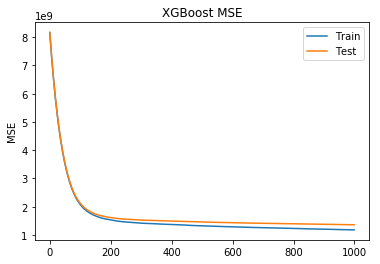

In [123]:
# plot mse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('MSE')
plt.title('XGBoost MSE')
plt.show()

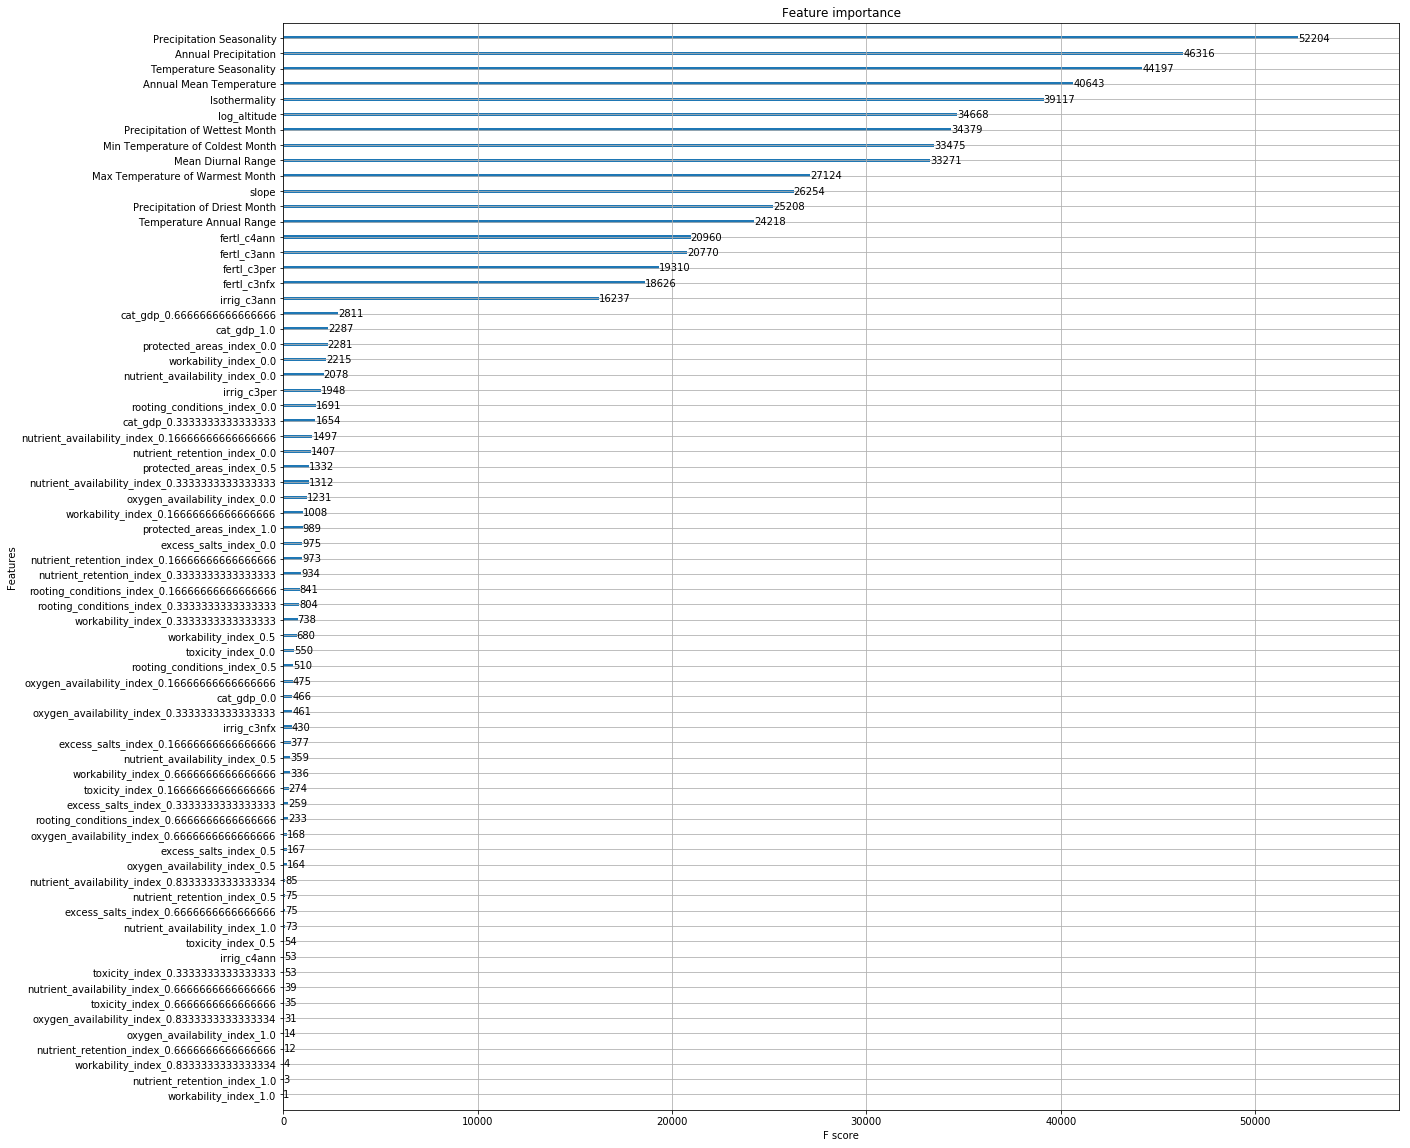

In [130]:
# which are the most influential features
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(model, ax=ax)
plt.show()

### With irrig data

In [131]:
X, y = df_2000.drop(['calories_per_ha'], axis=1), df_2000['calories_per_ha']
X = pd.get_dummies(X, columns=non_numerical_col)

data_dmatrix = xgb.DMatrix(data=X, label=y)

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [133]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["rmse"], eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:8.1548e+09	validation_1-rmse:8.17288e+09
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:8.00346e+09	validation_1-rmse:8.02175e+09
[2]	validation_0-rmse:7.85655e+09	validation_1-rmse:7.87425e+09
[3]	validation_0-rmse:7.71199e+09	validation_1-rmse:7.72959e+09
[4]	validation_0-rmse:7.57064e+09	validation_1-rmse:7.58774e+09
[5]	validation_0-rmse:7.43308e+09	validation_1-rmse:7.45004e+09
[6]	validation_0-rmse:7.29831e+09	validation_1-rmse:7.31556e+09
[7]	validation_0-rmse:7.16592e+09	validation_1-rmse:7.18314e+09
[8]	validation_0-rmse:7.03842e+09	validation_1-rmse:7.05629e+09
[9]	validation_0-rmse:6.91191e+09	validation_1-rmse:6.92971e+09
[10]	validation_0-rmse:6.78772e+09	validation_1-rmse:6.80517e+09
[11]	validation_0-rmse:6.66653e+09	validation_1-rmse:6.68364e+09
[12]	validation_0-rmse:6.54595e+09	validation_1-rmse:6.56381e+09
[13]	va

[124]	validation_0-rmse:1.80834e+09	validation_1-rmse:1.86758e+09
[125]	validation_0-rmse:1.80081e+09	validation_1-rmse:1.86052e+09
[126]	validation_0-rmse:1.79344e+09	validation_1-rmse:1.85344e+09
[127]	validation_0-rmse:1.7861e+09	validation_1-rmse:1.84663e+09
[128]	validation_0-rmse:1.77915e+09	validation_1-rmse:1.84011e+09
[129]	validation_0-rmse:1.77228e+09	validation_1-rmse:1.83371e+09
[130]	validation_0-rmse:1.76513e+09	validation_1-rmse:1.82712e+09
[131]	validation_0-rmse:1.75853e+09	validation_1-rmse:1.82088e+09
[132]	validation_0-rmse:1.75216e+09	validation_1-rmse:1.81494e+09
[133]	validation_0-rmse:1.74649e+09	validation_1-rmse:1.80964e+09
[134]	validation_0-rmse:1.74037e+09	validation_1-rmse:1.80391e+09
[135]	validation_0-rmse:1.73427e+09	validation_1-rmse:1.7981e+09
[136]	validation_0-rmse:1.72804e+09	validation_1-rmse:1.79242e+09
[137]	validation_0-rmse:1.72208e+09	validation_1-rmse:1.78685e+09
[138]	validation_0-rmse:1.71651e+09	validation_1-rmse:1.78164e+09
[139]	valida

[249]	validation_0-rmse:1.45456e+09	validation_1-rmse:1.5541e+09
[250]	validation_0-rmse:1.45383e+09	validation_1-rmse:1.55354e+09
[251]	validation_0-rmse:1.45259e+09	validation_1-rmse:1.55258e+09
[252]	validation_0-rmse:1.45174e+09	validation_1-rmse:1.55194e+09
[253]	validation_0-rmse:1.45076e+09	validation_1-rmse:1.55124e+09
[254]	validation_0-rmse:1.44995e+09	validation_1-rmse:1.55049e+09
[255]	validation_0-rmse:1.44923e+09	validation_1-rmse:1.54988e+09
[256]	validation_0-rmse:1.44798e+09	validation_1-rmse:1.54889e+09
[257]	validation_0-rmse:1.44712e+09	validation_1-rmse:1.54821e+09
[258]	validation_0-rmse:1.44567e+09	validation_1-rmse:1.54702e+09
[259]	validation_0-rmse:1.44475e+09	validation_1-rmse:1.54635e+09
[260]	validation_0-rmse:1.44347e+09	validation_1-rmse:1.54544e+09
[261]	validation_0-rmse:1.44309e+09	validation_1-rmse:1.54515e+09
[262]	validation_0-rmse:1.4426e+09	validation_1-rmse:1.54482e+09
[263]	validation_0-rmse:1.4422e+09	validation_1-rmse:1.54453e+09
[264]	validat

[374]	validation_0-rmse:1.36586e+09	validation_1-rmse:1.48636e+09
[375]	validation_0-rmse:1.36561e+09	validation_1-rmse:1.4862e+09
[376]	validation_0-rmse:1.36518e+09	validation_1-rmse:1.48584e+09
[377]	validation_0-rmse:1.36449e+09	validation_1-rmse:1.48533e+09
[378]	validation_0-rmse:1.36387e+09	validation_1-rmse:1.48485e+09
[379]	validation_0-rmse:1.36361e+09	validation_1-rmse:1.48467e+09
[380]	validation_0-rmse:1.36301e+09	validation_1-rmse:1.48423e+09
[381]	validation_0-rmse:1.3628e+09	validation_1-rmse:1.48408e+09
[382]	validation_0-rmse:1.36235e+09	validation_1-rmse:1.48378e+09
[383]	validation_0-rmse:1.36184e+09	validation_1-rmse:1.48342e+09
[384]	validation_0-rmse:1.36106e+09	validation_1-rmse:1.48281e+09
[385]	validation_0-rmse:1.36074e+09	validation_1-rmse:1.48259e+09
[386]	validation_0-rmse:1.36042e+09	validation_1-rmse:1.48239e+09
[387]	validation_0-rmse:1.35991e+09	validation_1-rmse:1.48198e+09
[388]	validation_0-rmse:1.35957e+09	validation_1-rmse:1.48176e+09
[389]	valida

[499]	validation_0-rmse:1.30638e+09	validation_1-rmse:1.44265e+09
[500]	validation_0-rmse:1.30591e+09	validation_1-rmse:1.44229e+09
[501]	validation_0-rmse:1.30584e+09	validation_1-rmse:1.44225e+09
[502]	validation_0-rmse:1.30505e+09	validation_1-rmse:1.44169e+09
[503]	validation_0-rmse:1.30434e+09	validation_1-rmse:1.44121e+09
[504]	validation_0-rmse:1.30411e+09	validation_1-rmse:1.44106e+09
[505]	validation_0-rmse:1.30397e+09	validation_1-rmse:1.44098e+09
[506]	validation_0-rmse:1.3031e+09	validation_1-rmse:1.44032e+09
[507]	validation_0-rmse:1.30257e+09	validation_1-rmse:1.44002e+09
[508]	validation_0-rmse:1.30209e+09	validation_1-rmse:1.43969e+09
[509]	validation_0-rmse:1.30121e+09	validation_1-rmse:1.43907e+09
[510]	validation_0-rmse:1.30059e+09	validation_1-rmse:1.43865e+09
[511]	validation_0-rmse:1.30041e+09	validation_1-rmse:1.43854e+09
[512]	validation_0-rmse:1.29927e+09	validation_1-rmse:1.43766e+09
[513]	validation_0-rmse:1.29904e+09	validation_1-rmse:1.43753e+09
[514]	valid

[624]	validation_0-rmse:1.25624e+09	validation_1-rmse:1.4076e+09
[625]	validation_0-rmse:1.25585e+09	validation_1-rmse:1.40736e+09
[626]	validation_0-rmse:1.25581e+09	validation_1-rmse:1.40735e+09
[627]	validation_0-rmse:1.25561e+09	validation_1-rmse:1.40721e+09
[628]	validation_0-rmse:1.25513e+09	validation_1-rmse:1.40687e+09
[629]	validation_0-rmse:1.25481e+09	validation_1-rmse:1.40666e+09
[630]	validation_0-rmse:1.25465e+09	validation_1-rmse:1.40658e+09
[631]	validation_0-rmse:1.25414e+09	validation_1-rmse:1.40621e+09
[632]	validation_0-rmse:1.25355e+09	validation_1-rmse:1.40576e+09
[633]	validation_0-rmse:1.2533e+09	validation_1-rmse:1.4056e+09
[634]	validation_0-rmse:1.25312e+09	validation_1-rmse:1.40546e+09
[635]	validation_0-rmse:1.25258e+09	validation_1-rmse:1.40508e+09
[636]	validation_0-rmse:1.25246e+09	validation_1-rmse:1.40501e+09
[637]	validation_0-rmse:1.25235e+09	validation_1-rmse:1.40494e+09
[638]	validation_0-rmse:1.25195e+09	validation_1-rmse:1.40466e+09
[639]	validat

[749]	validation_0-rmse:1.22357e+09	validation_1-rmse:1.38545e+09
[750]	validation_0-rmse:1.2233e+09	validation_1-rmse:1.38524e+09
[751]	validation_0-rmse:1.22316e+09	validation_1-rmse:1.38516e+09
[752]	validation_0-rmse:1.22309e+09	validation_1-rmse:1.38511e+09
[753]	validation_0-rmse:1.22283e+09	validation_1-rmse:1.38495e+09
[754]	validation_0-rmse:1.2226e+09	validation_1-rmse:1.38479e+09
[755]	validation_0-rmse:1.22233e+09	validation_1-rmse:1.38461e+09
[756]	validation_0-rmse:1.22166e+09	validation_1-rmse:1.38414e+09
[757]	validation_0-rmse:1.22151e+09	validation_1-rmse:1.38403e+09
[758]	validation_0-rmse:1.22136e+09	validation_1-rmse:1.38393e+09
[759]	validation_0-rmse:1.22081e+09	validation_1-rmse:1.38359e+09
[760]	validation_0-rmse:1.22074e+09	validation_1-rmse:1.38355e+09
[761]	validation_0-rmse:1.22046e+09	validation_1-rmse:1.38335e+09
[762]	validation_0-rmse:1.2201e+09	validation_1-rmse:1.3831e+09
[763]	validation_0-rmse:1.21943e+09	validation_1-rmse:1.38266e+09
[764]	validati

[874]	validation_0-rmse:1.19213e+09	validation_1-rmse:1.3645e+09
[875]	validation_0-rmse:1.19208e+09	validation_1-rmse:1.36448e+09
[876]	validation_0-rmse:1.19163e+09	validation_1-rmse:1.36416e+09
[877]	validation_0-rmse:1.19143e+09	validation_1-rmse:1.36402e+09
[878]	validation_0-rmse:1.19128e+09	validation_1-rmse:1.36396e+09
[879]	validation_0-rmse:1.19093e+09	validation_1-rmse:1.36375e+09
[880]	validation_0-rmse:1.19078e+09	validation_1-rmse:1.36369e+09
[881]	validation_0-rmse:1.19042e+09	validation_1-rmse:1.36344e+09
[882]	validation_0-rmse:1.19012e+09	validation_1-rmse:1.36324e+09
[883]	validation_0-rmse:1.19001e+09	validation_1-rmse:1.36318e+09
[884]	validation_0-rmse:1.1897e+09	validation_1-rmse:1.36297e+09
[885]	validation_0-rmse:1.18924e+09	validation_1-rmse:1.36263e+09
[886]	validation_0-rmse:1.18892e+09	validation_1-rmse:1.36241e+09
[887]	validation_0-rmse:1.18872e+09	validation_1-rmse:1.36229e+09
[888]	validation_0-rmse:1.18811e+09	validation_1-rmse:1.36189e+09
[889]	valida

[999]	validation_0-rmse:1.16192e+09	validation_1-rmse:1.34509e+09


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=10,
       min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
       nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1)

In [134]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.9129942546846166


In [135]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
epochs

1000

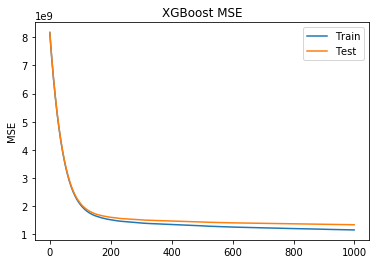

In [136]:
# plot mse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('MSE')
plt.title('XGBoost MSE')
plt.show()

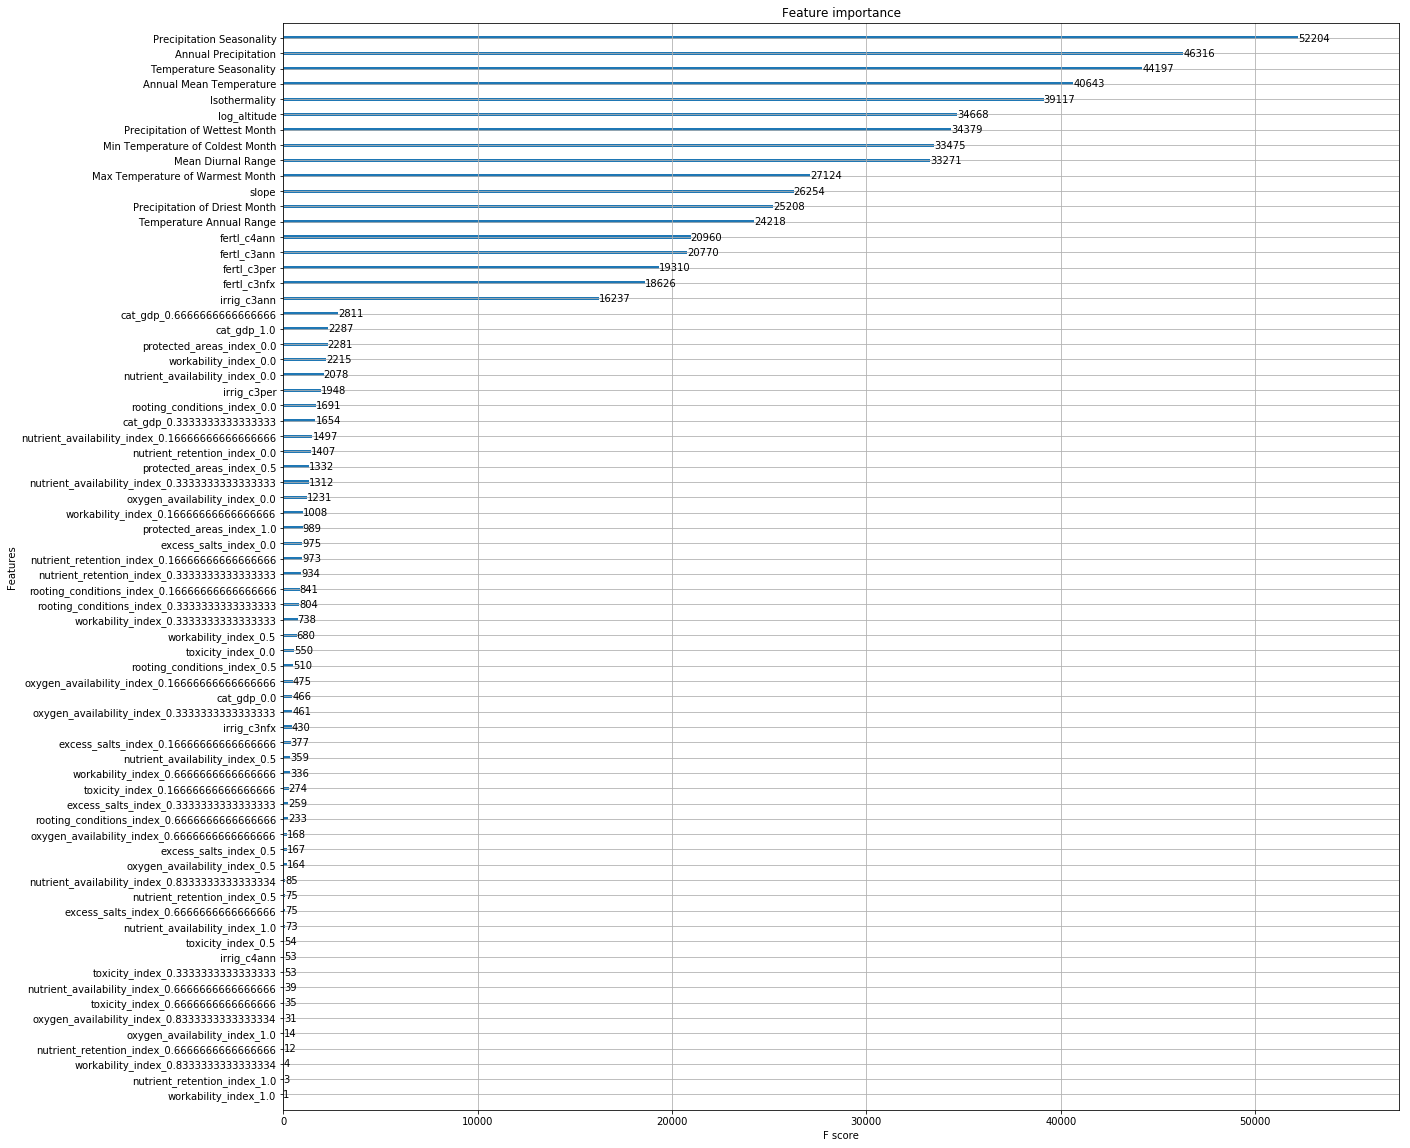

In [137]:
# which are the most influential features
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(model, ax=ax)
plt.show()

## Tests

In [4]:
df_2000 = pd.read_csv(inputs_path + 'normalized_2000_gdp_cat.csv', index_col='pixel_id', na_values=[-9999]).drop(['log_GDP_pc'], axis=1)

In [5]:
df_2000.head()

,slope,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Annual Precipitation,Precipitation of Wettest Month,...,nutrient_availability_index,oxygen_availability_index,workability_index,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,calories_per_ha,cat_gdp
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,-0.153686,-1.475497,-1.165186,-1.144281,0.809341,-1.712443,-1.131726,0.526905,-0.529328,-0.764668,...,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,8.917904e+09,1.0
1276867,-0.044311,-1.450093,-1.237776,-1.168411,0.799235,-1.697998,-1.119308,0.518887,-0.542167,-0.789142,...,0.333333,0.500000,0.0,0.0,0.166667,0.0,0.0,0.0,8.917904e+09,1.0
1276868,-0.064612,-1.451896,-1.224768,-1.167575,0.812007,-1.682255,-1.121053,0.529160,-0.552153,-0.780984,...,0.333333,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,8.917905e+09,1.0
1298466,-0.029986,-1.373057,-1.550443,-1.245204,0.779111,-1.614412,-0.995392,0.407722,-0.629187,-0.797301,...,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,8.917906e+09,1.0
1298467,-0.027755,-1.386652,-1.462573,-1.218038,0.766754,-1.639893,-1.020766,0.426180,-0.619201,-0.789142,...,0.333333,0.333333,0.0,0.0,0.166667,0.0,0.0,0.0,8.917904e+09,1.0


In [6]:
X, y = df_2000.drop(['calories_per_ha'], axis=1), df_2000['calories_per_ha']
X = pd.get_dummies(X, columns=non_numerical_col)

data_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,slope,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Annual Precipitation,Precipitation of Wettest Month,...,rooting_conditions_index_0.16666666666666666,rooting_conditions_index_0.3333333333333333,rooting_conditions_index_0.5,rooting_conditions_index_0.6666666666666666,rooting_conditions_index_0.8333333333333334,rooting_conditions_index_1.0,cat_gdp_0.0,cat_gdp_0.3333333333333333,cat_gdp_0.6666666666666666,cat_gdp_1.0
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,-0.153686,-1.475497,-1.165186,-1.144281,0.809341,-1.712443,-1.131726,0.526905,-0.529328,-0.764668,...,0,0,0,0,0,0,0,0,0,1
1276867,-0.044311,-1.450093,-1.237776,-1.168411,0.799235,-1.697998,-1.119308,0.518887,-0.542167,-0.789142,...,0,0,0,0,0,0,0,0,0,1
1276868,-0.064612,-1.451896,-1.224768,-1.167575,0.812007,-1.682255,-1.121053,0.529160,-0.552153,-0.780984,...,0,0,0,0,0,0,0,0,0,1
1298466,-0.029986,-1.373057,-1.550443,-1.245204,0.779111,-1.614412,-0.995392,0.407722,-0.629187,-0.797301,...,0,0,0,0,0,0,0,0,0,1
1298467,-0.027755,-1.386652,-1.462573,-1.218038,0.766754,-1.639893,-1.020766,0.426180,-0.619201,-0.789142,...,0,0,0,0,0,0,0,0,0,1


In [7]:
params = {'objective': 'reg:linear', 'colsample_bytree': 0.85, 'learning_rate': 0.04, 'max_depth': 10,
 'min_child_weight': 3, 'n_estimators': 700, 'nthread': 4, 'verbosity': 2}

In [13]:
model_test = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True)

[15:38:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1624 extra nodes, 0 pruned nodes, max_depth=10
[15:38:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1598 extra nodes, 0 pruned nodes, max_depth=10
[15:38:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1580 extra nodes, 0 pruned nodes, max_depth=10
[15:39:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1646 extra nodes, 0 pruned nodes, max_depth=10
[15:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1618 extra nodes, 0 pruned nodes, max_depth=10
[15:39:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1496 extra nodes, 0 pruned nodes, max_depth=10
[15:39:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1522 extra nodes, 0 pruned nodes, max_depth=10
[15:39:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1516 extra nodes, 0 pruned nodes, max_depth=10
[15:39:51] INFO: src/tree/update

[15:48:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1562 extra nodes, 0 pruned nodes, max_depth=10
[15:49:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1422 extra nodes, 0 pruned nodes, max_depth=10
[15:49:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1670 extra nodes, 0 pruned nodes, max_depth=10
[15:49:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1734 extra nodes, 0 pruned nodes, max_depth=10
[15:49:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1646 extra nodes, 0 pruned nodes, max_depth=10
[15:49:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1598 extra nodes, 0 pruned nodes, max_depth=10
[15:49:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1592 extra nodes, 0 pruned nodes, max_depth=10
[15:50:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1728 extra nodes, 0 pruned nodes, max_depth=10
[15:50:10] INFO: src/tree/update

[15:59:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1820 extra nodes, 0 pruned nodes, max_depth=10
[15:59:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1784 extra nodes, 0 pruned nodes, max_depth=10
[15:59:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1804 extra nodes, 0 pruned nodes, max_depth=10
[15:59:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1628 extra nodes, 0 pruned nodes, max_depth=10
[15:59:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1524 extra nodes, 0 pruned nodes, max_depth=10
[16:00:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1812 extra nodes, 0 pruned nodes, max_depth=10
[16:00:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1828 extra nodes, 0 pruned nodes, max_depth=10
[16:00:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1804 extra nodes, 0 pruned nodes, max_depth=10
[16:00:31] INFO: src/tree/update

[16:09:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1838 extra nodes, 0 pruned nodes, max_depth=10
[16:09:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1802 extra nodes, 0 pruned nodes, max_depth=10
[16:09:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1568 extra nodes, 0 pruned nodes, max_depth=10
[16:09:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1600 extra nodes, 0 pruned nodes, max_depth=10
[16:09:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1842 extra nodes, 0 pruned nodes, max_depth=10
[16:09:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1824 extra nodes, 0 pruned nodes, max_depth=10
[16:10:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1796 extra nodes, 0 pruned nodes, max_depth=10
[16:10:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1558 extra nodes, 0 pruned nodes, max_depth=10
[16:10:24] INFO: src/tree/update

In [47]:
model_test.tail(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
40,2.361099e+09,3.758405e+06,2.395776e+09,1.102685e+07
41,2.316005e+09,3.629049e+06,2.351899e+09,1.103201e+07
42,2.273548e+09,3.538997e+06,2.310597e+09,1.085839e+07
43,2.233062e+09,3.492109e+06,2.271417e+09,1.062356e+07
44,2.194623e+09,3.315616e+06,2.234106e+09,1.103074e+07
45,2.157959e+09,3.513743e+06,2.198758e+09,1.085700e+07
46,2.123190e+09,3.542874e+06,2.165131e+09,1.051938e+07
47,2.090514e+09,3.380915e+06,2.133658e+09,1.044886e+07
48,2.059887e+09,3.496924e+06,2.104218e+09,1.033827e+07
49,2.030108e+09,3.689027e+06,2.075746e+09,9.753438e+06


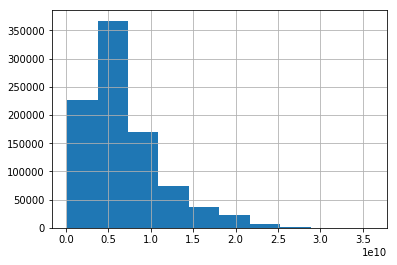

In [48]:
y.hist()

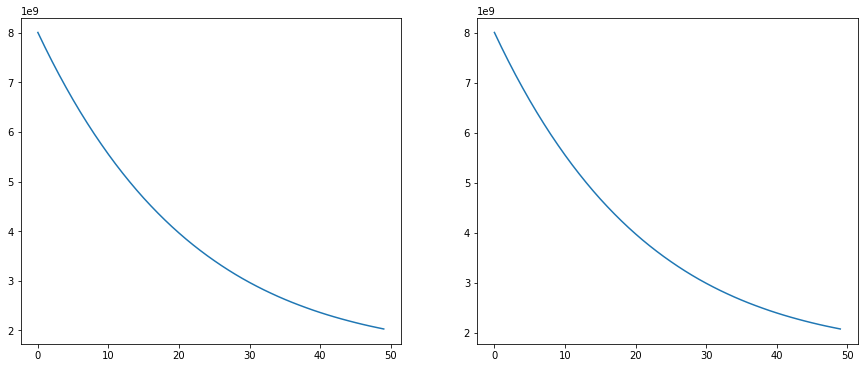

In [29]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.lineplot(data=model_test['train-rmse-mean'])
#sns.lineplot(data=model_test[])

plt.subplot(122)
sns.lineplot(data=model_test['test-rmse-mean'])
#sns.lineplot(data=model_test[])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [38]:
xg_reg = xgb.XGBRegressor(params=params)

In [39]:
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

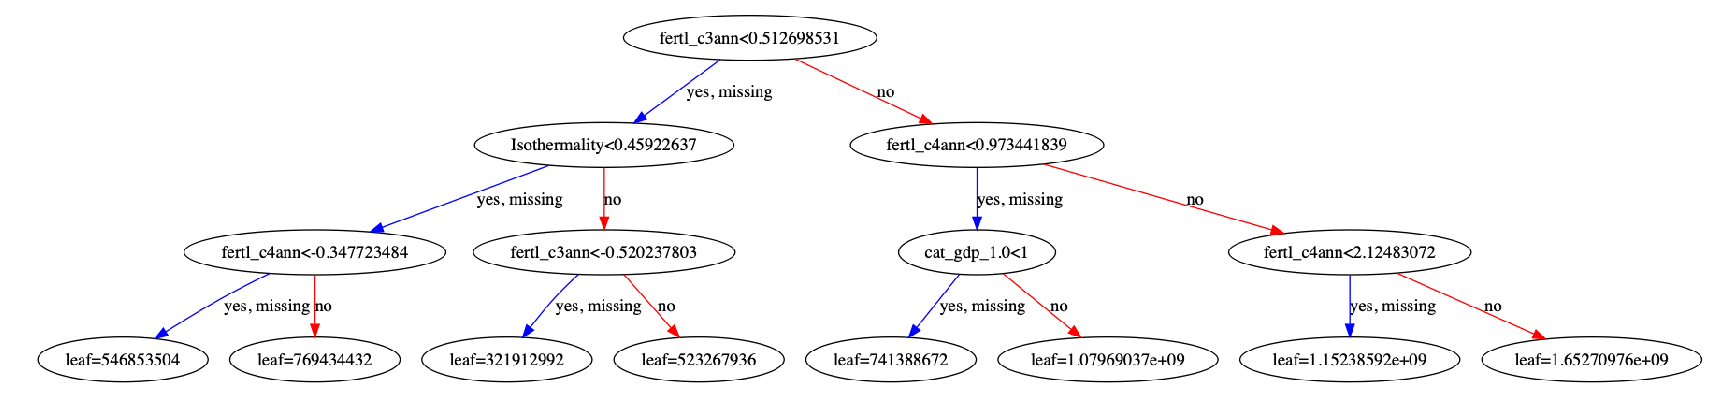

In [40]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(xg_reg, num_trees=0, ax=ax)
plt.show()

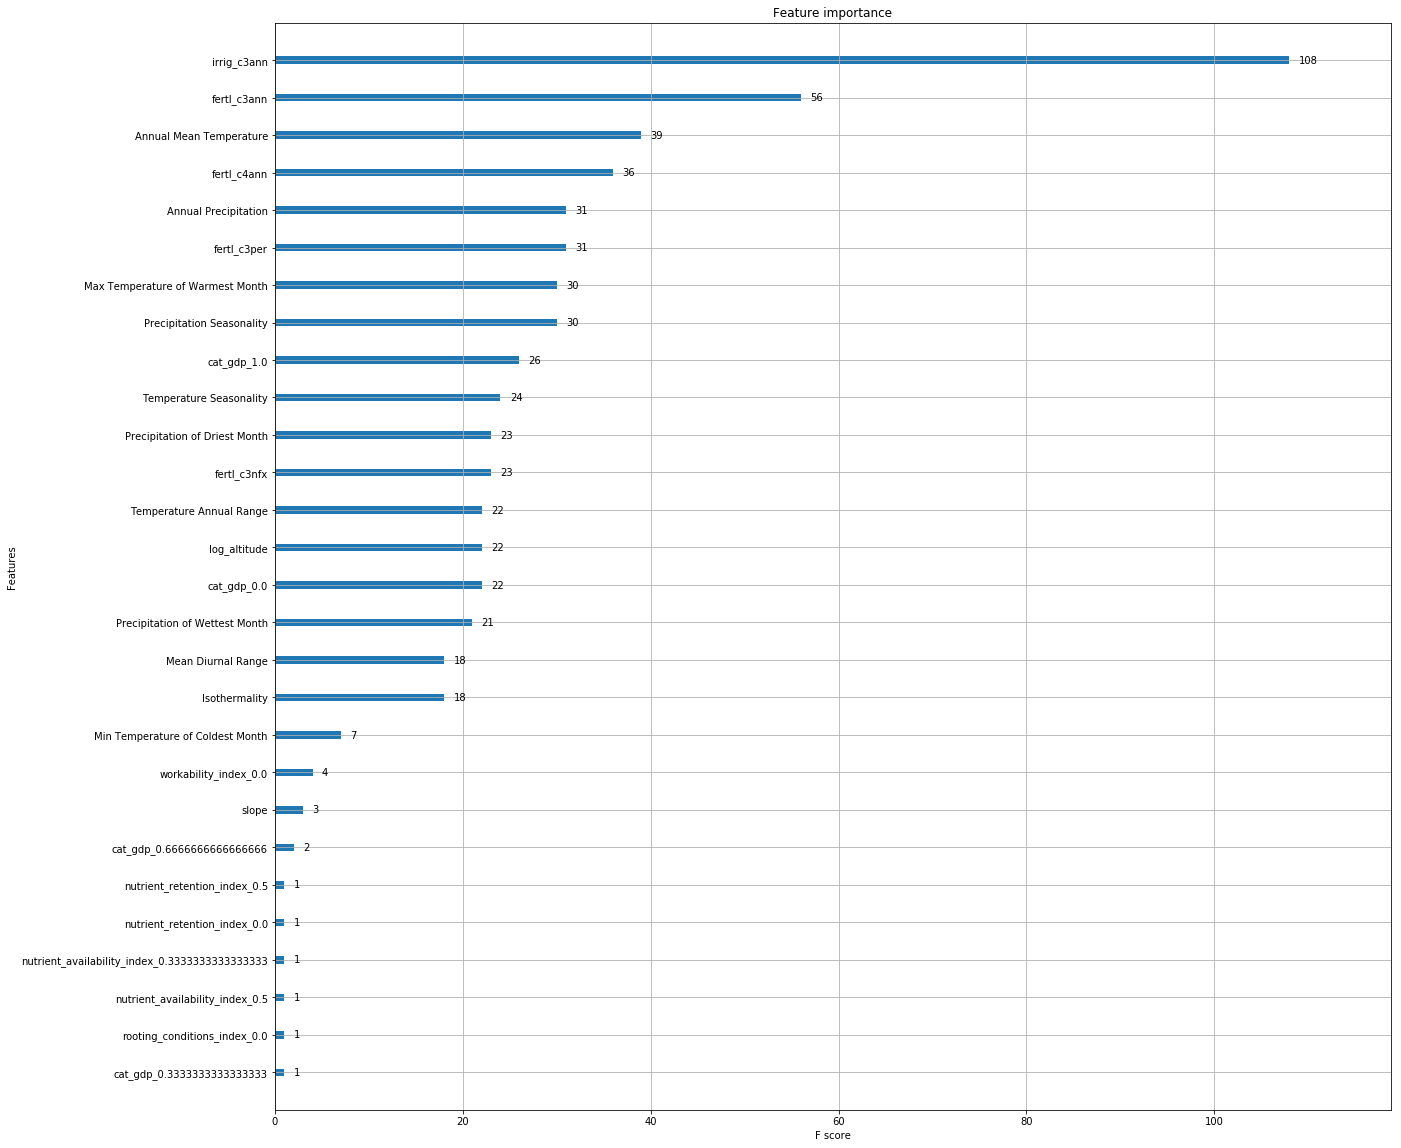

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(xg_reg, ax=ax)
plt.show()

In [60]:
df_2000_with_full_gdp = pd.read_csv(inputs_path + 'normalized_2000.csv', index_col='pixel_id', na_values=[-9999])

In [61]:
df_2000_with_full_gdp.head()

,slope,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Annual Precipitation,Precipitation of Wettest Month,...,irrig_c4per,nutrient_availability_index,oxygen_availability_index,workability_index,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,calories_per_ha
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,-0.153686,-1.475497,-1.165186,-1.144281,0.809341,-1.712443,-1.131726,0.526905,-0.529328,-0.764668,...,-0.408186,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,8.917904e+09
1276867,-0.044311,-1.450093,-1.237776,-1.168411,0.799235,-1.697998,-1.119308,0.518887,-0.542167,-0.789142,...,-0.408186,0.333333,0.500000,0.0,0.0,0.166667,0.0,0.0,0.0,8.917904e+09
1276868,-0.064612,-1.451896,-1.224768,-1.167575,0.812007,-1.682255,-1.121053,0.529160,-0.552153,-0.780984,...,-0.408186,0.333333,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,8.917905e+09
1298466,-0.029986,-1.373057,-1.550443,-1.245204,0.779111,-1.614412,-0.995392,0.407722,-0.629187,-0.797301,...,-0.408186,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,8.917906e+09
1298467,-0.027755,-1.386652,-1.462573,-1.218038,0.766754,-1.639893,-1.020766,0.426180,-0.619201,-0.789142,...,-0.408186,0.333333,0.333333,0.0,0.0,0.166667,0.0,0.0,0.0,8.917904e+09


In [62]:
X_with_full_gdp, y_with_full_gdp = df_2000.drop(['calories_per_ha'], axis=1), df_2000['calories_per_ha']
col2 = non_numerical_col.copy()
col2.remove('cat_gdp')
X_with_full_gdp = pd.get_dummies(X_with_full_gdp, columns=col2).drop(['cat_gdp'], axis=1)

data_dmatrix_2 = xgb.DMatrix(data=X_with_full_gdp,label=y_with_full_gdp)

In [63]:
X_train_with_full_gdp, X_test_with_full_gdp, y_train_with_full_gdp, y_test_with_full_gdp = train_test_split(X_with_full_gdp, y_with_full_gdp, test_size=0.1, random_state=123)

In [54]:
model_test2 = xgb.cv(dtrain=data_dmatrix_2, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True)

[16:51:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1548 extra nodes, 0 pruned nodes, max_depth=10
[16:51:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1520 extra nodes, 0 pruned nodes, max_depth=10
[16:51:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1540 extra nodes, 0 pruned nodes, max_depth=10
[16:51:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1522 extra nodes, 0 pruned nodes, max_depth=10
[16:51:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1528 extra nodes, 0 pruned nodes, max_depth=10
[16:52:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1408 extra nodes, 0 pruned nodes, max_depth=10
[16:52:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1570 extra nodes, 0 pruned nodes, max_depth=10
[16:52:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1562 extra nodes, 0 pruned nodes, max_depth=10
[16:52:29] INFO: src/tree/update

[17:00:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1688 extra nodes, 0 pruned nodes, max_depth=10
[17:01:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1748 extra nodes, 0 pruned nodes, max_depth=10
[17:01:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1740 extra nodes, 0 pruned nodes, max_depth=10
[17:01:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1688 extra nodes, 0 pruned nodes, max_depth=10
[17:01:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1770 extra nodes, 0 pruned nodes, max_depth=10
[17:01:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1452 extra nodes, 0 pruned nodes, max_depth=10
[17:01:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1728 extra nodes, 0 pruned nodes, max_depth=10
[17:01:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1768 extra nodes, 0 pruned nodes, max_depth=10
[17:02:08] INFO: src/tree/update

[17:12:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1822 extra nodes, 0 pruned nodes, max_depth=10
[17:12:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1636 extra nodes, 0 pruned nodes, max_depth=10
[17:12:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1808 extra nodes, 0 pruned nodes, max_depth=10
[17:12:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1690 extra nodes, 0 pruned nodes, max_depth=10
[17:12:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1800 extra nodes, 0 pruned nodes, max_depth=10
[17:13:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1802 extra nodes, 0 pruned nodes, max_depth=10
[17:13:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1788 extra nodes, 0 pruned nodes, max_depth=10
[17:13:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1660 extra nodes, 0 pruned nodes, max_depth=10
[17:13:37] INFO: src/tree/update

KeyboardInterrupt: 

[17:16:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1816 extra nodes, 0 pruned nodes, max_depth=10
[17:16:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1800 extra nodes, 0 pruned nodes, max_depth=10
[17:16:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1880 extra nodes, 0 pruned nodes, max_depth=10
[17:16:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1808 extra nodes, 0 pruned nodes, max_depth=10
[17:17:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1830 extra nodes, 0 pruned nodes, max_depth=10
[17:17:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1782 extra nodes, 0 pruned nodes, max_depth=10
[17:17:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1704 extra nodes, 0 pruned nodes, max_depth=10
[17:17:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1836 extra nodes, 0 pruned nodes, max_depth=10
[17:17:50] INFO: src/tree/update

[17:28:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1822 extra nodes, 0 pruned nodes, max_depth=10
[17:28:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1714 extra nodes, 0 pruned nodes, max_depth=10
[17:28:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1852 extra nodes, 0 pruned nodes, max_depth=10
[17:28:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1898 extra nodes, 0 pruned nodes, max_depth=10
[17:29:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1824 extra nodes, 0 pruned nodes, max_depth=10
[17:29:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1898 extra nodes, 0 pruned nodes, max_depth=10
[17:29:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1846 extra nodes, 0 pruned nodes, max_depth=10
[17:29:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1844 extra nodes, 0 pruned nodes, max_depth=10
[17:29:39] INFO: src/tree/update

In [55]:
model_test2.tail(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
40,2.359995e+09,2.658178e+06,2.393146e+09,1.016506e+07
41,2.315319e+09,1.769694e+06,2.349588e+09,1.016333e+07
42,2.272903e+09,1.623514e+06,2.308379e+09,1.017377e+07
43,2.233278e+09,1.701656e+06,2.269731e+09,9.789872e+06
44,2.195127e+09,1.786554e+06,2.232654e+09,9.859686e+06
45,2.158399e+09,2.108169e+06,2.197253e+09,9.950299e+06
46,2.123979e+09,2.550181e+06,2.164007e+09,1.022584e+07
47,2.092047e+09,2.273107e+06,2.133112e+09,1.011593e+07
48,2.061508e+09,1.998648e+06,2.103749e+09,1.013530e+07
49,2.032539e+09,2.670255e+06,2.075923e+09,9.861223e+06


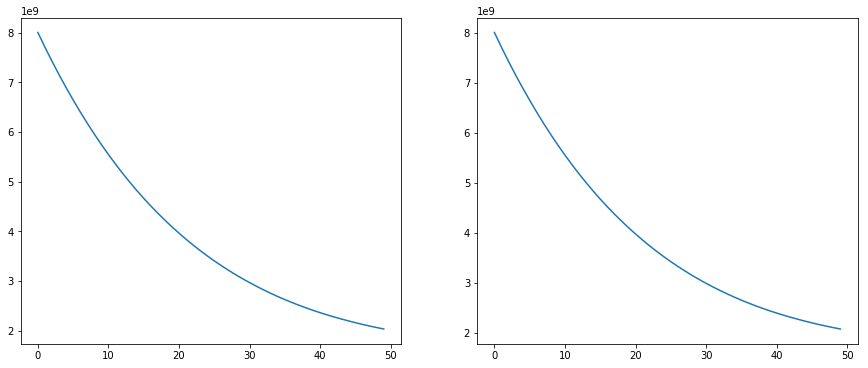

In [56]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.lineplot(data=model_test2['train-rmse-mean'])
#sns.lineplot(data=model_test[])

plt.subplot(122)
sns.lineplot(data=model_test2['test-rmse-mean'])
#sns.lineplot(data=model_test[])

In [64]:
xg_reg2 = xgb.XGBRegressor(params=params)

In [65]:
xg_reg2.fit(X_train_with_full_gdp, y_train_with_full_gdp)

preds2 = xg_reg2.predict(X_test_with_full_gdp)

ValueError: Unable to parse node: 5:[Annual

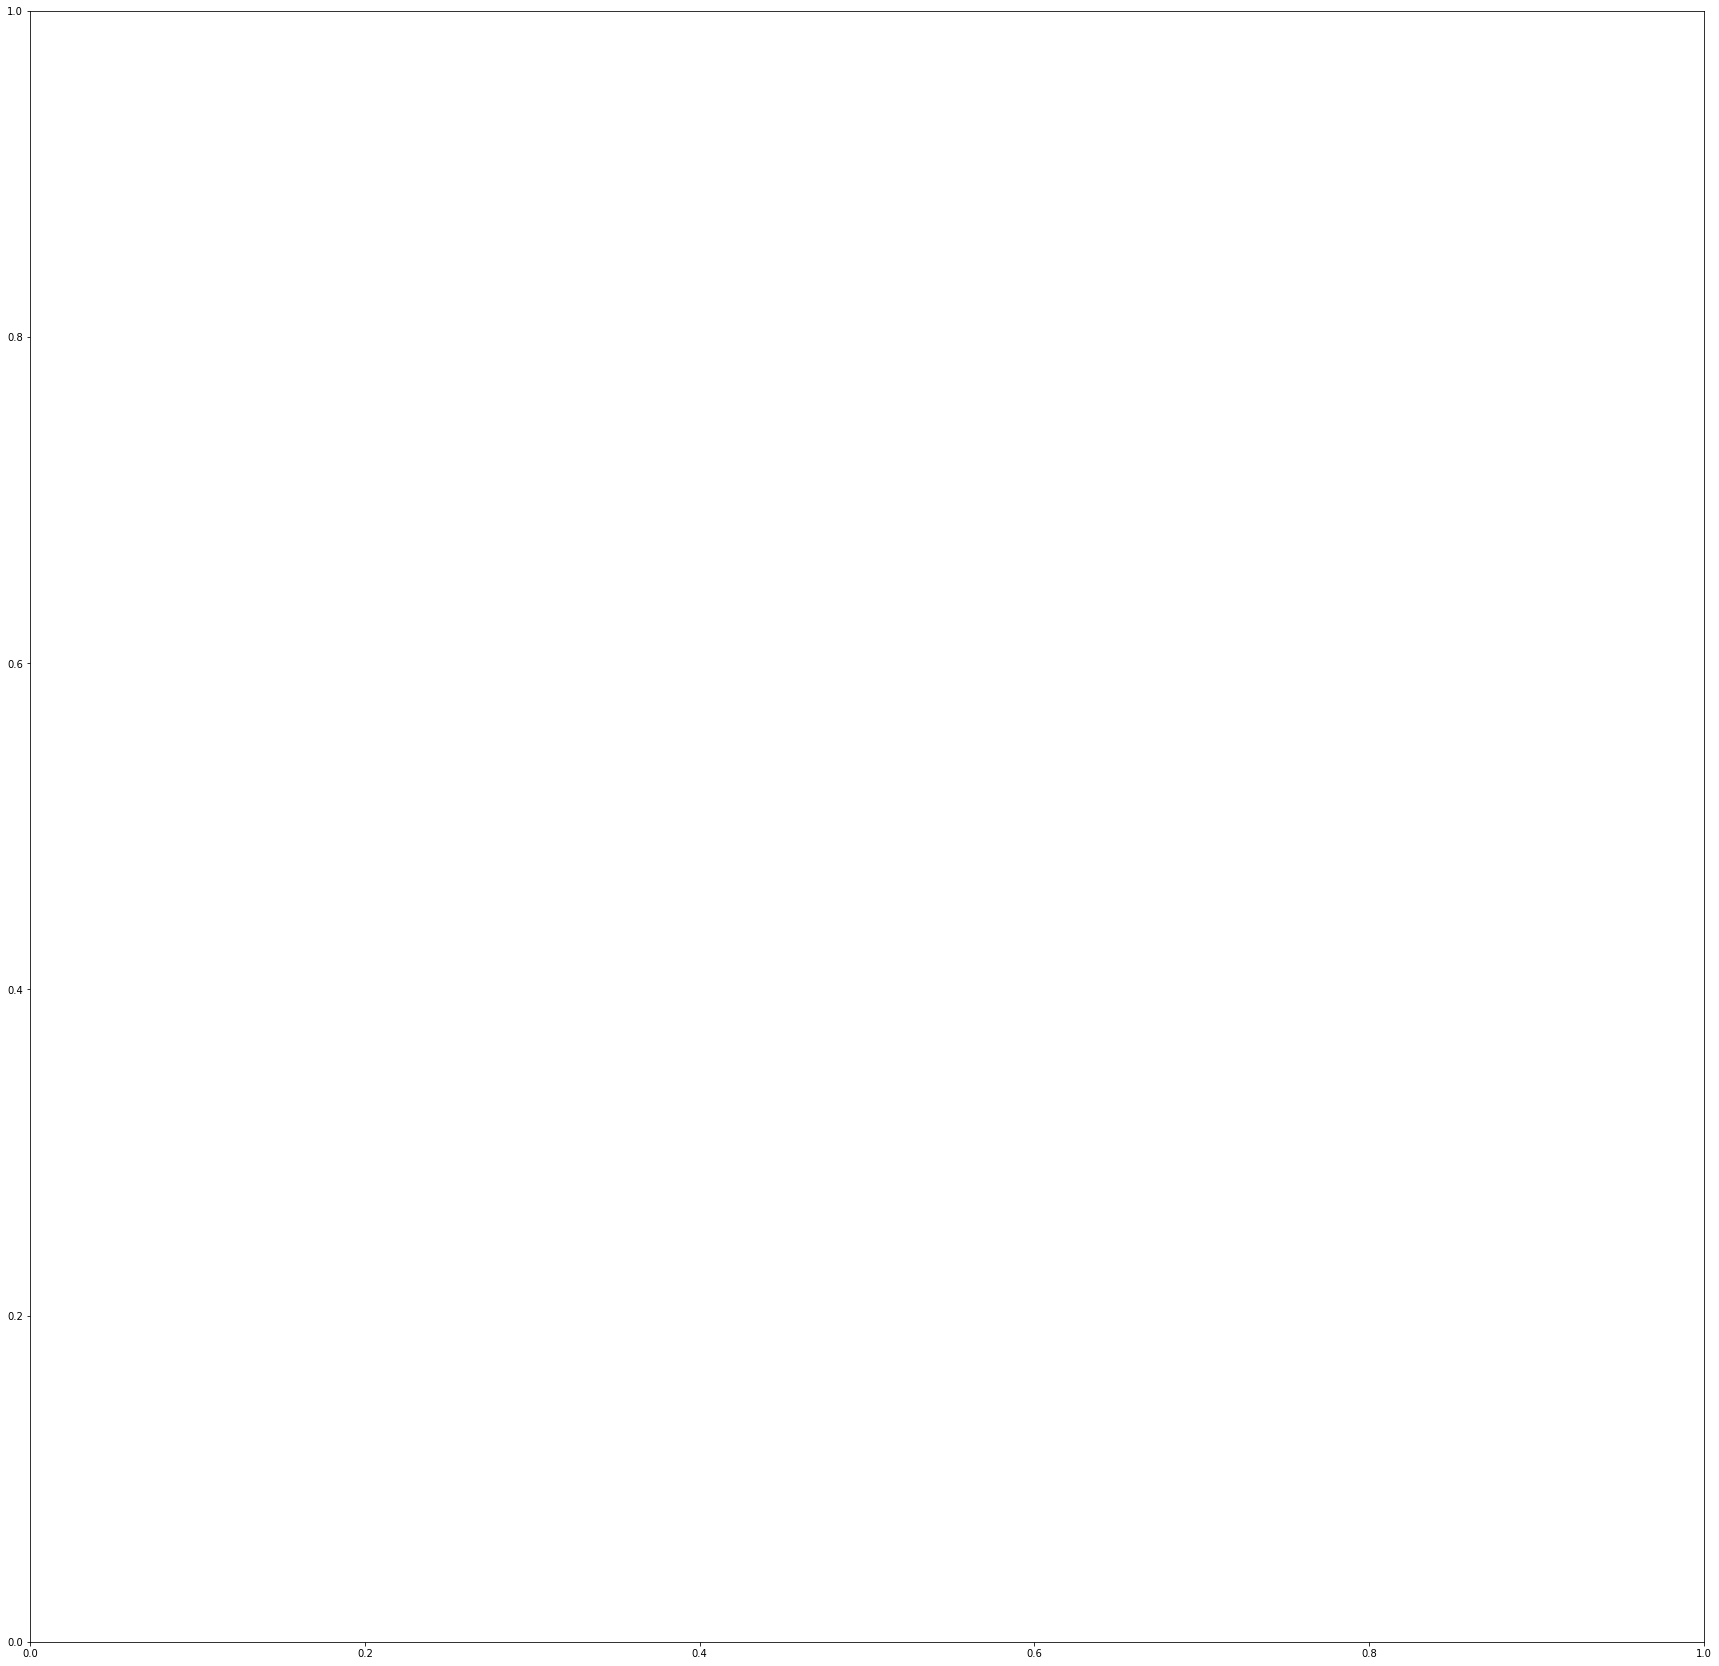

In [66]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(xg_reg2, num_trees=0, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(xg_reg2, ax=ax)
plt.show()

In [15]:
test = pd.read_csv(inputs_path + 'cc_ssp1_gdp_cat.csv', index_col='pixel_id', na_values=[-9999]).drop(['lat', '%cropland', 'lon', 'log_GDP_pc'], axis=1)

/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
test.head()

,nutrient_availability_index,oxygen_availability_index,workability_index,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,slope,Annual Mean Temperature,...,fertl_c3per,fertl_c4ann,fertl_c4per,log_altitude,irrig_c3ann,irrig_c3per,irrig_c3nfx,irrig_c4ann,irrig_c4per,cat_gdp
pixel_id,,,,,,,,,,,,,,,,,,,,,
776595,6.0,6.0,6.0,0,6.0,6.0,6.0,6.0,0.002578,-111.0,...,0.0,0.0,NaN,4.663439,0.0,0.0,0.0,0.0,0.0,1.0
780822,6.0,6.0,6.0,0,6.0,6.0,6.0,6.0,0.001471,-100.0,...,0.0,0.0,NaN,4.343805,0.0,0.0,0.0,0.0,0.0,1.0
780823,6.0,6.0,6.0,0,6.0,6.0,6.0,6.0,0.001618,-101.0,...,0.0,0.0,NaN,4.499810,0.0,0.0,0.0,0.0,0.0,1.0
780827,6.0,6.0,6.0,0,6.0,6.0,6.0,6.0,0.015301,-102.0,...,0.0,0.0,NaN,4.510860,0.0,0.0,0.0,0.0,0.0,1.0
780915,6.0,6.0,6.0,0,6.0,6.0,6.0,6.0,0.006398,-110.0,...,0.0,0.0,NaN,4.477337,0.0,0.0,0.0,0.0,0.0,1.0
